In [54]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [55]:
def section(t, m=np.asarray([0,0]), n=2):
    '''
    Artificial time series 
    '''
    angle1, angle2 = m[0], m[1]
    return np.cos(angle1)*np.cos(n*t) + np.cos(angle2)*np.sin(n*t)

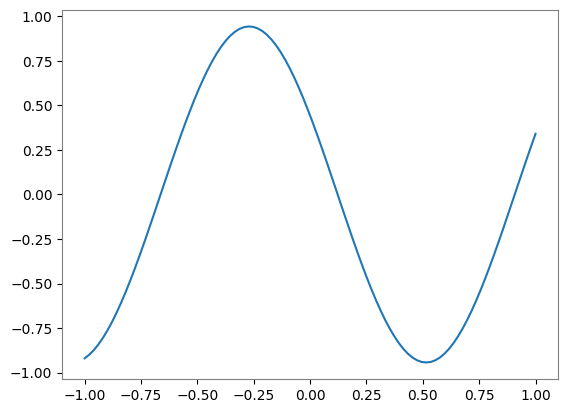

In [56]:
p = np.random.uniform(low=0.0, high=2*np.pi, size=2)

ts = np.linspace(-1,1, num=100)
plt.plot(ts, section(ts, p, n=4))

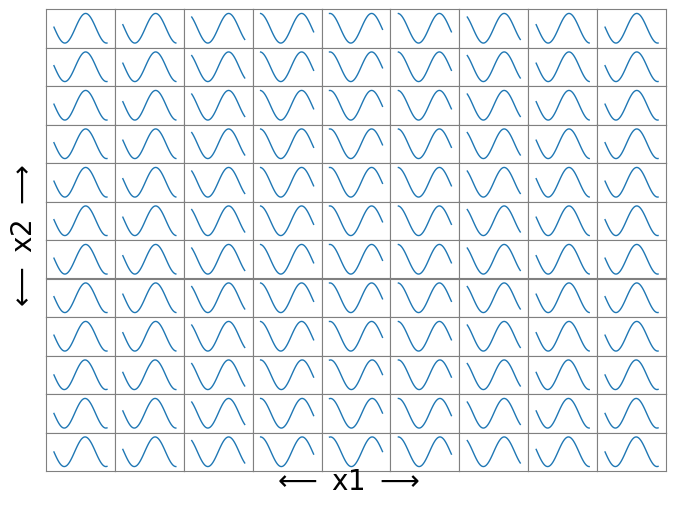

In [57]:
# plot decorrelated coordinates

bins_y = 12
bins_x = 9

pts = np.meshgrid(np.linspace(0, 2*np.pi, num=bins_x), np.linspace(0, 2*np.pi, num=bins_y))
x,y = pts[0].flatten(), pts[1].flatten()
import matplotlib
matplotlib.rc('axes',edgecolor='grey')

fig, ax = plt.subplots(bins_y,bins_x, figsize=(8,6))
plt.subplots_adjust(hspace=0, wspace=0)
fig.text(0.5, 0.08, r'$\longleftarrow$ x1 $\longrightarrow$', ha='center', fontsize=20)
fig.text(0.08, 0.5, r'$\longleftarrow$ x2 $\longrightarrow$', va='center', fontsize=20, rotation=90)


for i in range(bins_x):
    for j in range(bins_y):
        ts = np.linspace(-1,1,num=100)

        outs = section(ts, [x[i], y[j]], n=4)
        ax[j,i].plot(ts, outs,linewidth=1)
        ax[j,i].margins(0.15)

        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])


In [ ]:
import torch
from scipy.spatial.distance import cdist
def section_torch(t, m, n=2):
    """
    Artificial time series (batch-wise, shared t)

    t : Tensor of shape (T,)
    m : Tensor of shape (B, 2)
    n : scalar
    """
    print(m.shape)
    angle1 = m[:, 0].unsqueeze(1)  # (B, 1)
    angle2 = m[:, 1].unsqueeze(1)  # (B, 1)

    t = t.unsqueeze(0)  # (1, T)

    return (
        torch.cos(angle1) * torch.cos(n * t) +
        torch.cos(angle2) * torch.sin(n * t)
    )

def gen_target(nodes = 100, num_t= 1000, eps=1.0):
    pts = torch.rand((100, 2))*2*torch.pi
    embed_pts = np.column_stack([np.cos(pts[:,0]), np.sin(pts[:,0]), np.cos(pts[:,1]), np.sin(pts[:,1])])
    dist_mat = cdist(embed_pts, embed_pts)
    print(pts.shape)
    ts = torch.linspace(-1,1, steps=num_t)
    outs = section_torch(ts, pts)

    connectivity = torch.zeros((len(dist_mat), len(dist_mat)))
    connectivity[ dist_mat < eps] = 1.0
    
    return outs,  connectivity

In [31]:
outs, connectivity = gen_target()

torch.Size([100, 2])
torch.Size([100, 2])


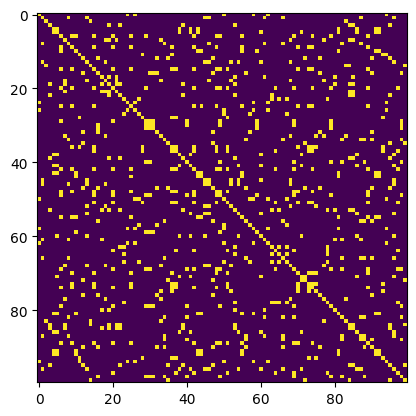

In [38]:
plt.imshow(connectivity)

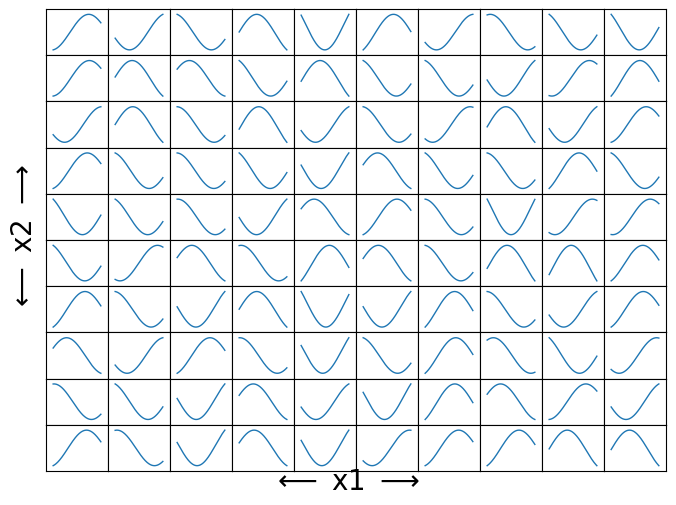

In [23]:
import matplotlib.pyplot as plt
import numpy as np
bins_x = 10
bins_y = 10
fig, ax = plt.subplots(bins_y,bins_x, figsize=(8,6))
plt.subplots_adjust(hspace=0, wspace=0)
fig.text(0.5, 0.08, r'$\longleftarrow$ x1 $\longrightarrow$', ha='center', fontsize=20)
fig.text(0.08, 0.5, r'$\longleftarrow$ x2 $\longrightarrow$', va='center', fontsize=20, rotation=90)


for i in range(bins_x):
    for j in range(bins_y):
        ts = np.linspace(-1,1,num=1000)
        ax[j,i].plot(ts, outs[i*10+j],linewidth=1)
        ax[j,i].margins(0.15)

        ax[j,i].set_xticks([])
        ax[j,i].set_yticks([])

In [ ]:
from tsl.data import SpatioTemporalDataset

torch_dataset = SpatioTemporalDataset(target=outs.T,
                                      connectivity=connectivity,)

SpatioTemporalDataset(n_samples=988, n_nodes=100, n_channels=1)


In [ ]:
import torch
import torch_geometric as tg
from torch import nn 

class Parallel_Transport(nn.Module):
    '''Class to implement parallel transport between time series
    '''
    def __init__(self, 
                 kernel_func='MSE',
                 n_nodes = None) -> None:
        super().__init__(*args, **kwargs)
        self.float
    def forward():
        